# Die Exponentialverteilung

Die folgenden [Daten](http://jse.amstat.org/datasets/babyboom.dat.txt) entstammen *A Simple Dataset for Demonstrating Common Distributions, Peter K. Dunn, Journal of Statistics Eduction, 1999* und sind [hier](http://jse.amstat.org/datasets/babyboom.txt) beschrieben.

Sie entstammen einem Geburtenrekord von 44 Babys, die innerhalb von 24 Stunden im Mater Mothers' Hospital, Brisbane, Australien am 18.12.1997 geboren wurden.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("http://jse.amstat.org/datasets/babyboom.dat.txt", names=['Uhrzeit', 'Geschlecht', 'Gewicht', 'Minuten'], sep=' ', skipinitialspace=True, dtype={'Uhrzeit': str})
df

,Uhrzeit,Geschlecht,Gewicht,Minuten
0,0005,1,3837,5
1,0104,1,3334,64
2,0118,2,3554,78
3,0155,2,3838,115
4,0257,2,3625,177
5,0405,1,2208,245
6,0407,1,1745,247
7,0422,2,2846,262
8,0431,2,3166,271
9,0708,2,3520,428


## Exponentialverteilung
Wir modellieren im Folgenden die Zeit zwischen 2 Geburten mit Hilfe der Exponentialverteilung.

In [3]:
# Minuten = Geburtszeit in Anzahl der Minuten nach Mitternacht
# Berechnung der Wartezeit zwischen 2 Geburten
df['Wartezeit'] = df['Minuten'] - df['Minuten'].shift(1)
df

,Uhrzeit,Geschlecht,Gewicht,Minuten,Wartezeit
0,0005,1,3837,5,NaN
1,0104,1,3334,64,59.0
2,0118,2,3554,78,14.0
3,0155,2,3838,115,37.0
4,0257,2,3625,177,62.0
5,0405,1,2208,245,68.0
6,0407,1,1745,247,2.0
7,0422,2,2846,262,15.0
8,0431,2,3166,271,9.0
9,0708,2,3520,428,157.0


In [4]:
# Abzählen der Häufigkeiten nach folgenden Klassen
klassen = [0, 20, 40, 60, 80, max(df['Wartezeit'].iloc[1:])]
print("   Klasse   Häufigkeit")
print("----------------------")
print(df['Wartezeit'].value_counts(bins=klassen).sort_index())

   Klasse   Häufigkeit
----------------------
(-0.001, 20.0]    18
(20.0, 40.0]      13
(40.0, 60.0]       5
(60.0, 80.0]       5
(80.0, 157.0]      2
Name: Wartezeit, dtype: int64


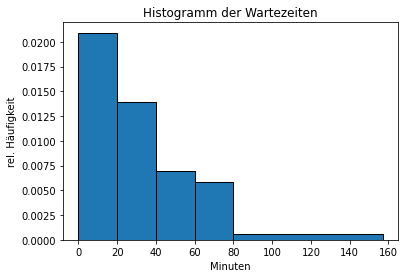

In [5]:
# erstelle Histogramm
ax = df['Wartezeit'].plot(kind='hist', bins=klassen, density=True, edgecolor='k', title='Histogramm der Wartezeiten')
ax.set_ylabel('rel. Häufigkeit')
ax.set_xlabel('Minuten');

## Schätzung des Parameters der Exponentialverteilung

Für den Parameter $\alpha$ der Exponentialverteilung gilt $E(X) = 1/\alpha$.

Wir schätzen den Erwartungswert durch das arithmetische Mittel
$$ E(X) = \frac{1}{\alpha} \;\approx\; \overline x = \frac{1}{\hat \alpha} $$

In [6]:
# Berechnung des arithmetischen Mittelwertes, d.h. der durchschnittlichen Wartezeit
mittlere_wartezeit = df['Wartezeit'].mean()
print("Mittlere Wartezeit in Minuten:", mittlere_wartezeit)

# der geschätze Parameter alpha ist demnach
α = 1/mittlere_wartezeit
print("α =", α)

Mittlere Wartezeit in Minuten: 33.25581395348837
α = 0.03006993006993007


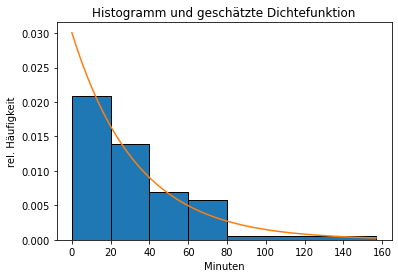

In [7]:
# Vergleich des Histogramms mit der geschätzen Dichtefunktion
import numpy as np

def dichte_exp(x, α):
    return α * np.exp(-α*x)

fig, ax = plt.subplots()
df['Wartezeit'].plot(ax=ax, kind='hist', bins=klassen, density=True, edgecolor='k')
ax.set_ylabel('rel. Häufigkeit')
ax.set_xlabel('Minuten');
x = np.arange(0, klassen[-1], 0.1)
ax.plot(x,dichte_exp(x,α),'-')
ax.set_title("Histogramm und geschätzte Dichtefunktion");

## Frage

Wie groß ist die Wahrscheinlichkeit für eine Wartezeit von bis zu 5 Minuten zwischen 2 Geburten?

In [8]:
1-np.exp(-α*5)  # Verteilungfunktion P(X <= x) = F(x) = 1 - exp(-alpha*x)

0.13959291781289285

 Vergleich mit dem empirischen Wert:

In [9]:
len(df[df['Wartezeit'] <= 5]) / (len(df['Wartezeit'])-1)  # günstige Fälle / alle Fälle

0.13953488372093023

## Frage

Wie groß ist die Wahrscheinlichkeit für eine Wartezeit zwischen 10 und 12 Minuten zwischen 2 Geburten?

$$ P(10 \le X \le 12) = F(12) - F(10) $$

In [10]:
-np.exp(-α*12)+np.exp(-α*10)  # Verteilungfunktion P(X <= x) = F(x) = 1 - exp(-alpha*x)

0.04320923807798238

Vergleich mit dem empirischen Wert:

In [11]:
(len(df[df['Wartezeit'] <= 12]) - len(df[df['Wartezeit'] <= 10])) / (len(df['Wartezeit'])-1)  # günstige Fälle / alle Fälle

0.0